In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

#Scaling and Sampling the data
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
#Read your data
df = pd.read_csv('Train.csv')

In [4]:
#Check Data Shape (We have 16000 rows and 7 Columns)
df.shape

(16000, 7)

In [5]:
# Check for any missing values
df.isnull().any()

ACTIVITY       False
TIME           False
SL             False
EEG            False
BP             False
HR             False
CIRCLUATION    False
dtype: bool

In [6]:
# A quick look on how the data looks
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [7]:
# Moving our target Variable to the last column and sorting by time to make data cleaner

df = df[['TIME','SL','EEG','BP','HR','CIRCLUATION','ACTIVITY']]

In [8]:
df.rename(columns = {'CIRCLUATION':'CIRCULATION'},inplace=True)
df.sort_values(by ='TIME')

,TIME,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
1638,1954.23,5.553720e+01,-368.0,97,33,5,4
10444,2011.54,6.147210e+01,-617.0,92,33,5,4
10078,2017.36,5.425180e+01,-206.0,97,33,5,5
13004,2024.82,4.690760e+01,-343.0,92,33,5,4
15962,2060.16,4.809000e+01,-364.0,6,33,5,5
...,...,...,...,...,...,...,...
3435,41892.40,1.088640e+06,-21648.0,171,897,27204,0
6895,43915.50,1.566640e+06,-96449.0,163,874,37040,0
14714,44446.30,2.426140e+06,-25461.0,110,974,52210,0
7109,45110.20,1.088800e+06,-21376.0,259,889,23591,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
TIME           16000 non-null float64
SL             16000 non-null float64
EEG            16000 non-null float64
BP             16000 non-null int64
HR             16000 non-null int64
CIRCULATION    16000 non-null int64
ACTIVITY       16000 non-null int64
dtypes: float64(3), int64(4)
memory usage: 875.1 KB


In [10]:
df.corr()

,TIME,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
TIME,1.000000,0.844671,-0.048201,0.443018,0.974091,0.878109,-0.109977
SL,0.844671,1.000000,-0.051116,0.403027,0.859407,0.977733,-0.146713
EEG,-0.048201,-0.051116,1.000000,-0.050186,-0.050249,-0.050518,0.027213
BP,0.443018,0.403027,-0.050186,1.000000,0.469785,0.421059,-0.114525
HR,0.974091,0.859407,-0.050249,0.469785,1.000000,0.904295,-0.144209
CIRCULATION,0.878109,0.977733,-0.050518,0.421059,0.904295,1.000000,-0.134418
ACTIVITY,-0.109977,-0.146713,0.027213,-0.114525,-0.144209,-0.134418,1.000000


In [11]:
df.describe(include = "all")

,TIME,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
count,16000.000000,1.600000e+04,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000
mean,10928.568319,7.501312e+04,-5.649045e+03,58.246500,211.360813,2886.907813,2.363938
std,5256.510299,1.265950e+05,1.095037e+05,48.217701,129.714908,3802.279749,1.739124
min,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000,0.000000
25%,7261.787500,9.894760e+03,-5.628910e+03,25.000000,119.000000,587.000000,0.000000
50%,9768.170000,3.098530e+04,-3.360000e+03,44.000000,180.000000,1581.000000,3.000000
75%,13465.375000,8.065725e+04,-2.147760e+03,78.000000,271.000000,3539.000000,4.000000
max,50895.500000,2.426140e+06,1.410000e+06,533.000000,981.000000,52210.000000,5.000000


In [12]:
print(sorted(df['ACTIVITY'].unique()))
print('Here 0 indicates Standing, 1- Walking, 2- Sitting, 3 - Falling, 4 - Cramps, 5 - Running')



[0, 1, 2, 3, 4, 5]
Here 0 indicates Standing, 1- Walking, 2- Sitting, 3 - Falling, 4 - Cramps, 5 - Running


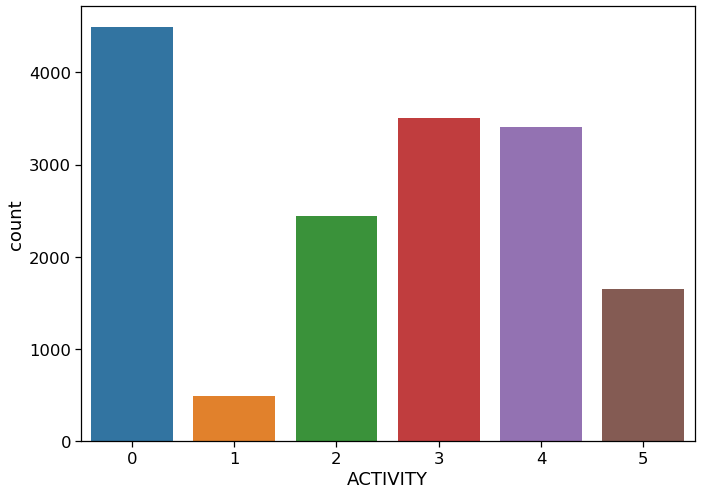

In [13]:
#Count the activity types in data 
sns.countplot(x='ACTIVITY', data=df)

In [14]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

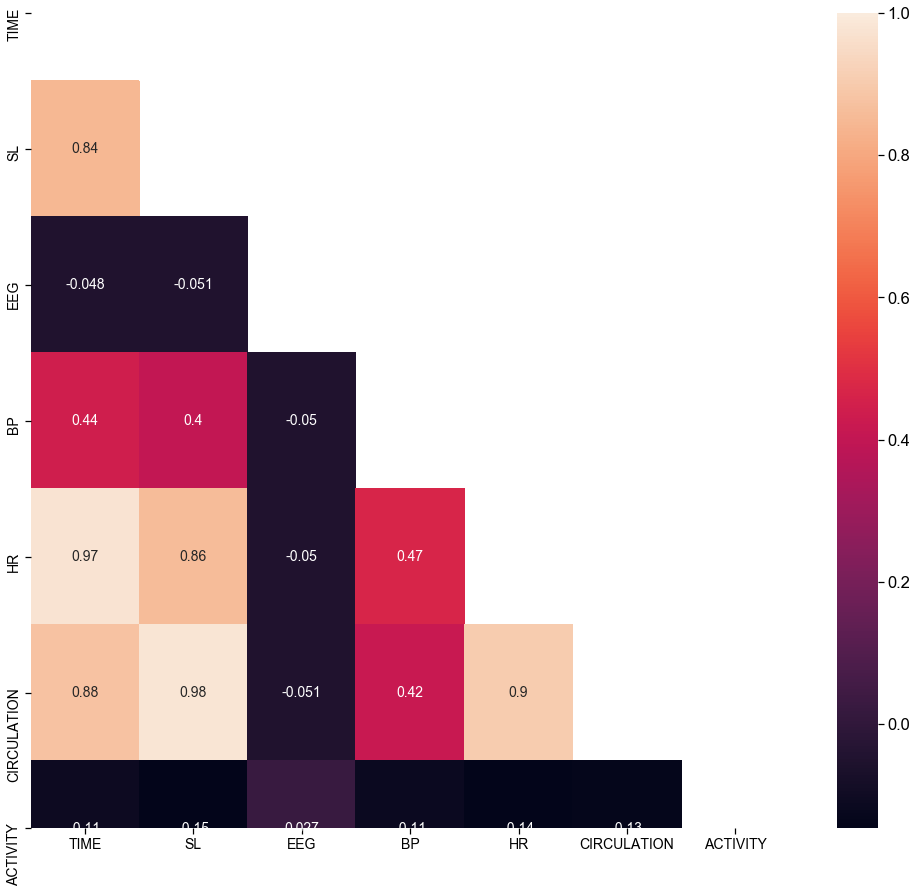

In [15]:
plt.figure(figsize = (17,15))
sns.heatmap(df.corr(),mask=mask,annot=True,annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

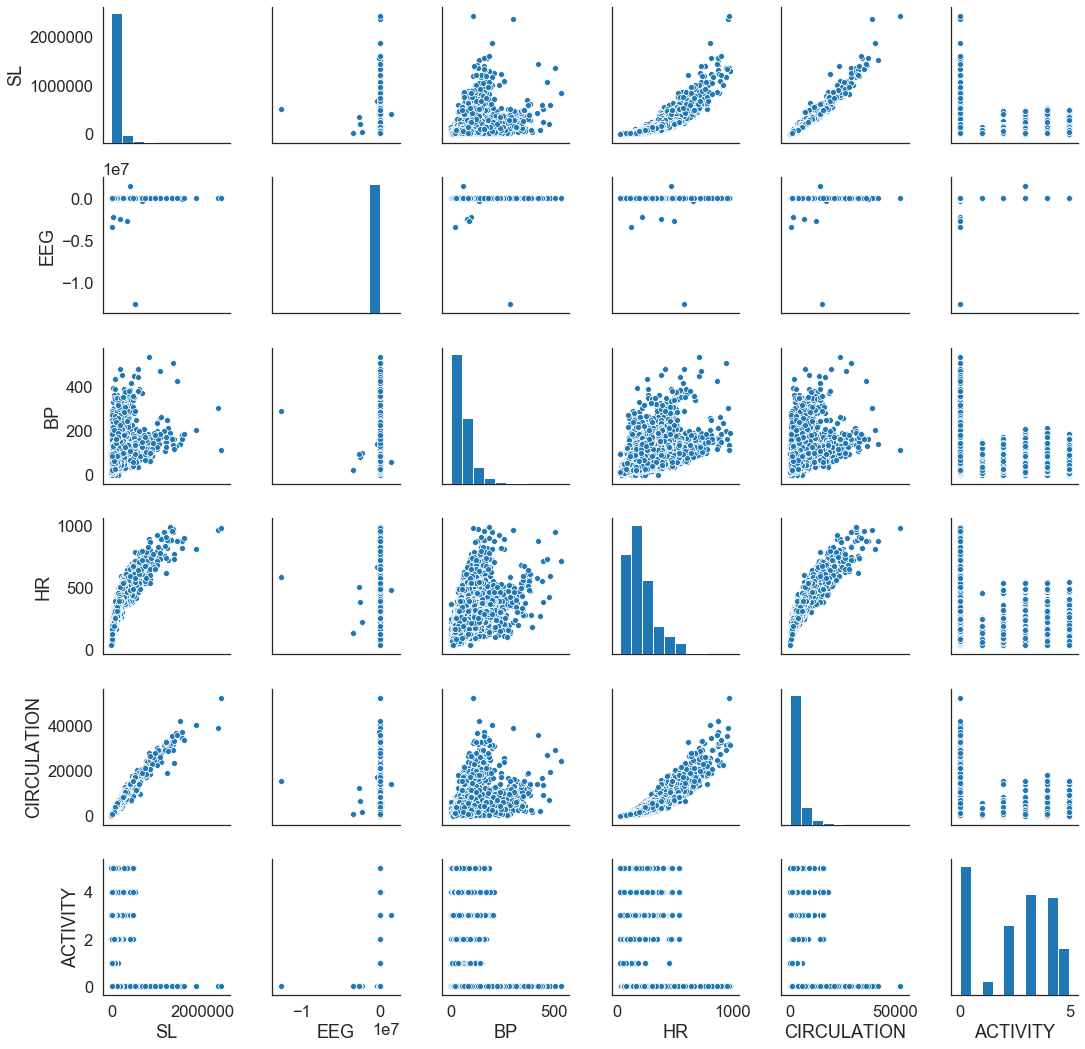

In [16]:
features = df.iloc[:,1:]
sns.pairplot(features) 
plt.show()

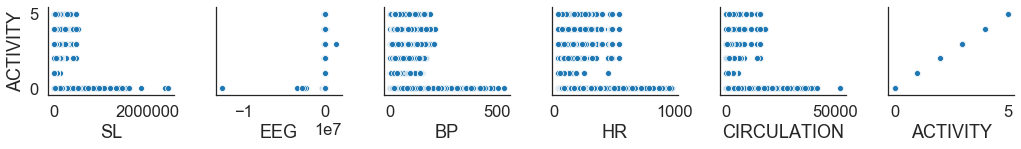

In [17]:
cols = list(features.columns)
sns.pairplot(df,x_vars=cols,y_vars='ACTIVITY')
plt.show()

In [18]:
# Now we can see we have some correlated features lets remove the outliers 
# Preserve our original data

original_data = df.copy()

In [19]:
cols = list(features.columns)
initial = len(df)
for i in cols:
  IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
  df = df[(df[i]< (df[i].quantile(0.75)+IQR)) & (df[i] > (df[i].quantile(0.25)-IQR))]
  
final = len(df)
print('Number of outliers removed',initial-final)

Number of outliers removed 4638


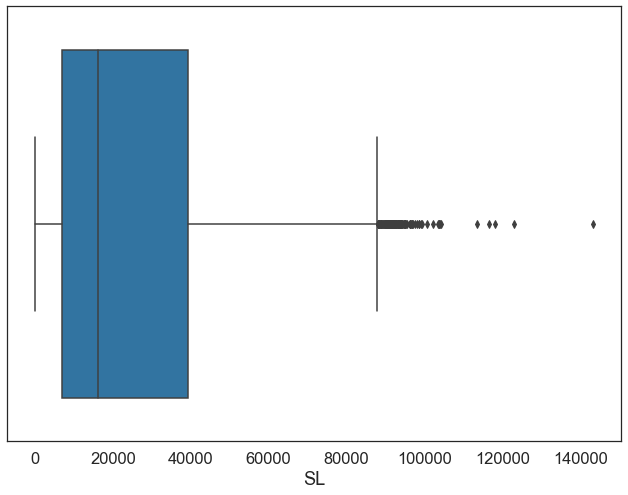

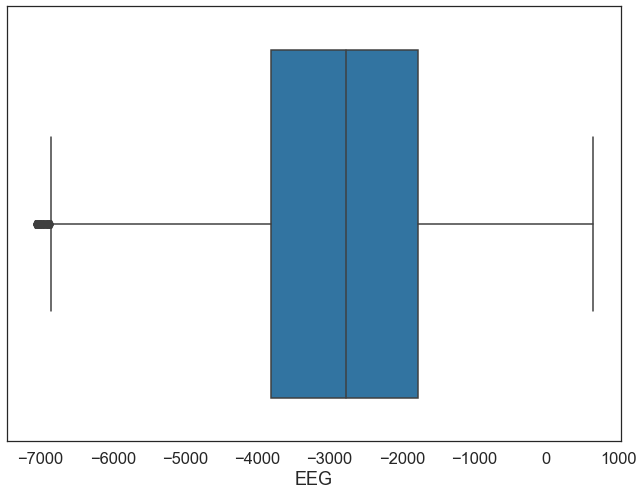

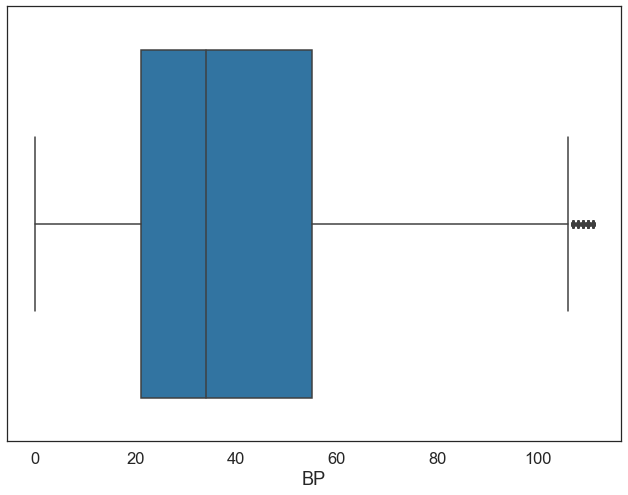

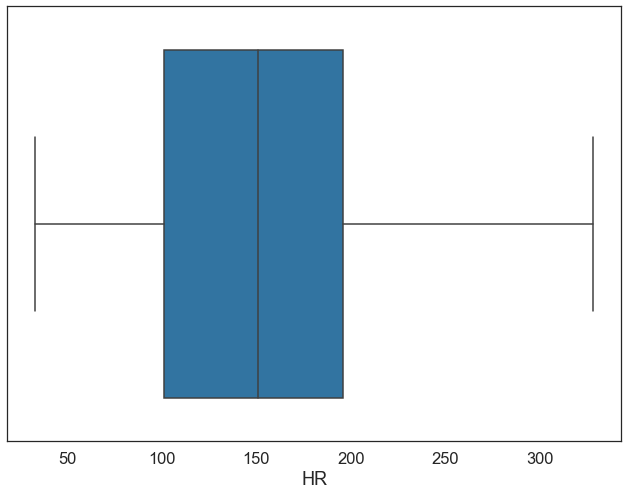

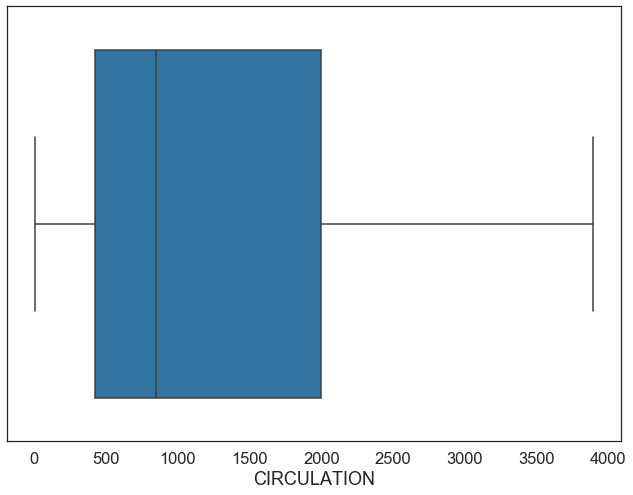

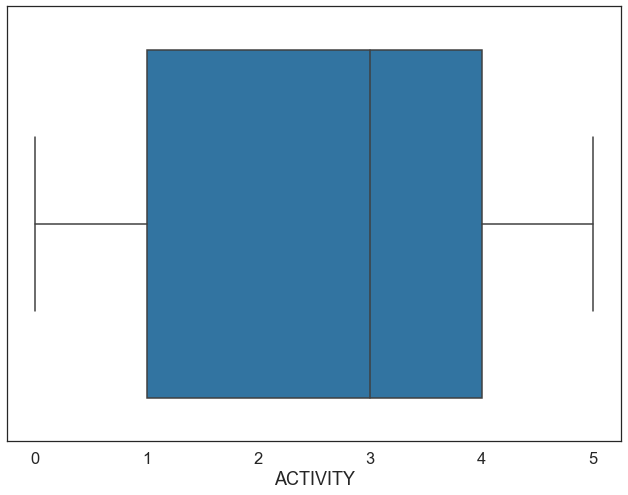

In [20]:
# After removing the outliers checking the distribution of each feature in the Dataset

for i in cols:
  sns.boxplot(df[i])
  plt.show()

In [21]:
#Splitting the data into training and test data 

train_X, test_X, train_y, test_y = train_test_split(df.drop(columns=['ACTIVITY'],axis=1), df['ACTIVITY'], test_size = 0.25)

In [22]:
#Scaling the Data
sc = StandardScaler()
train_X_scaled = sc.fit_transform(train_X)
test_X_scaled = sc.transform(test_X)

In [23]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20,dual=False)

In [24]:
# Train the model using the training sets and check score on test dataset
support.fit(train_X_scaled, train_y)
predicted1= support.predict(test_X_scaled)
score=accuracy_score(test_y,predicted1)
print("Your Model Accuracy is", score)


Your Model Accuracy is 0.3871876099964801


In [25]:
decision = DecisionTreeClassifier()


In [26]:
decision.fit(train_X_scaled,train_y)
predicted2 = decision.predict(test_X_scaled)
score=accuracy_score(test_y,predicted2)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.6497712073213657


In [27]:
logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=10500)

In [28]:
logreg.fit(train_X_scaled,train_y)
predicted3= logreg.predict(test_X_scaled)
score=accuracy_score(test_y,predicted3)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.3889475536782823


In [29]:
#Here we see the accuracy is pretty low with Decision Trees and SVM models 
df['ACTIVITY'].value_counts()

4    2702
3    2585
0    2513
2    1834
5    1311
1     417
Name: ACTIVITY, dtype: int64



As we see the data is quite imbalanced we can oversample the data to help with imbalancing 

Smote Analysis (to ensure all the data is equally distributed in the training set)

In [30]:
sm = SMOTE()
train_X_fin, train_y_fin = sm.fit_sample(train_X_scaled,train_y.ravel())

In [31]:
# lets Train the model again after SMOTE 
# Using SVM

support.fit(train_X_fin, train_y_fin)
predicted4= support.predict(test_X_scaled)
score=accuracy_score(test_y,predicted4)
print("Your Model Accuracy is", score)


Your Model Accuracy is 0.3069341781063006


In [32]:
decision.fit(train_X_fin,train_y_fin)
predicted5 = decision.predict(test_X_scaled)
score=accuracy_score(test_y,predicted5)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.6575149595212954


In [33]:
logreg.fit(train_X_fin,train_y_fin)
predicted6= logreg.predict(test_X_scaled)
score=accuracy_score(test_y,predicted6)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.3101020767335445


In [34]:
#After so many data manipulations, the accuracy score is still very less at 65% with DT
# thinking a way to help reduce the categorical variables here to a binary classification case with detection being limited to only FALL or No Fall case.


In [35]:
df.loc[:, 'ACTIVITY'] = df['ACTIVITY'].replace([0,1,2,3,4,5],[0,0,0,1,0,0])

In [36]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(columns=['ACTIVITY'],axis=1), df['ACTIVITY'], test_size = 0.25)

In [37]:
#Scaling the Data
sc = StandardScaler()
train_X_scaled = sc.fit_transform(train_X)
test_X_scaled = sc.transform(test_X)

In [38]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20,dual=False)

In [39]:
# Train the model using the training sets and check score on test dataset
support.fit(train_X_scaled, train_y)
predicted7= support.predict(test_X_scaled)
score=accuracy_score(test_y,predicted7)
print("Your Model Accuracy is", score)


Your Model Accuracy is 0.7652235128475888


In [40]:
decision = DecisionTreeClassifier(max_features='auto',class_weight='balanced')

In [41]:
decision.fit(train_X_scaled,train_y)
predicted8 = decision.predict(test_X_scaled)
score=accuracy_score(test_y,predicted8)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.8120380147835269


In [42]:
logreg = LogisticRegression(solver='lbfgs',max_iter=10500)

In [43]:
logreg.fit(train_X_scaled,train_y)
predicted9= logreg.predict(test_X_scaled)
score=accuracy_score(test_y,predicted9)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.7624076029567054


In [49]:
gbm = GradientBoostingClassifier(n_estimators=1000,max_depth=7)

In [50]:
gbm.fit(train_X_scaled,train_y)
predicted10= logreg.predict(test_X_scaled)
score=accuracy_score(test_y,predicted10)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.7624076029567054
